In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/genero'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
print(train_dir)

/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/genero/train


In [ ]:
train_hombre_dir = os.path.join(train_dir, 'hombre')  # directory with our training hombre pictures
train_mujer_dir = os.path.join(train_dir, 'mujer')  # directory with our training mujer pictures
validation_hombre_dir = os.path.join(validation_dir, 'hombre')  # directory with our validation hombre pictures
validation_mujer_dir = os.path.join(validation_dir, 'mujer')  # directory with our validation mujer pictures

In [ ]:
validation_mujer_dir

'/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/genero/validation/mujer'

In [ ]:
num_hombre_tr = len(os.listdir(train_hombre_dir))
num_mujer_tr = len(os.listdir(train_mujer_dir))

num_hombre_val = len(os.listdir(validation_hombre_dir))
num_mujer_val = len(os.listdir(validation_mujer_dir))

total_train = num_hombre_tr + num_mujer_tr
total_val = num_hombre_val + num_mujer_val

In [ ]:
print('total training hombre images:', num_hombre_tr)
print('total training mujer images:', num_mujer_tr)

print('total validation hombre images:', num_hombre_val)
print('total validation mujer images:', num_mujer_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training hombre images: 9429
total training mujer images: 8557
total validation hombre images: 2357
total validation mujer images: 2141
--
Total training images: 17986
Total validation images: 4498


In [ ]:
batch_size = 100
epochs = 15
IMG_SHAPE = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, 
                                                     directory=train_dir, 
                                                     # Its usually best practice to shuffle the training data
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150) 
                                                     class_mode='binary')

Found 17986 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, 
                                                              directory=validation_dir, 
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 4498 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen) 
sample_training_images.shape

(100, 150, 150, 3)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(150,150))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

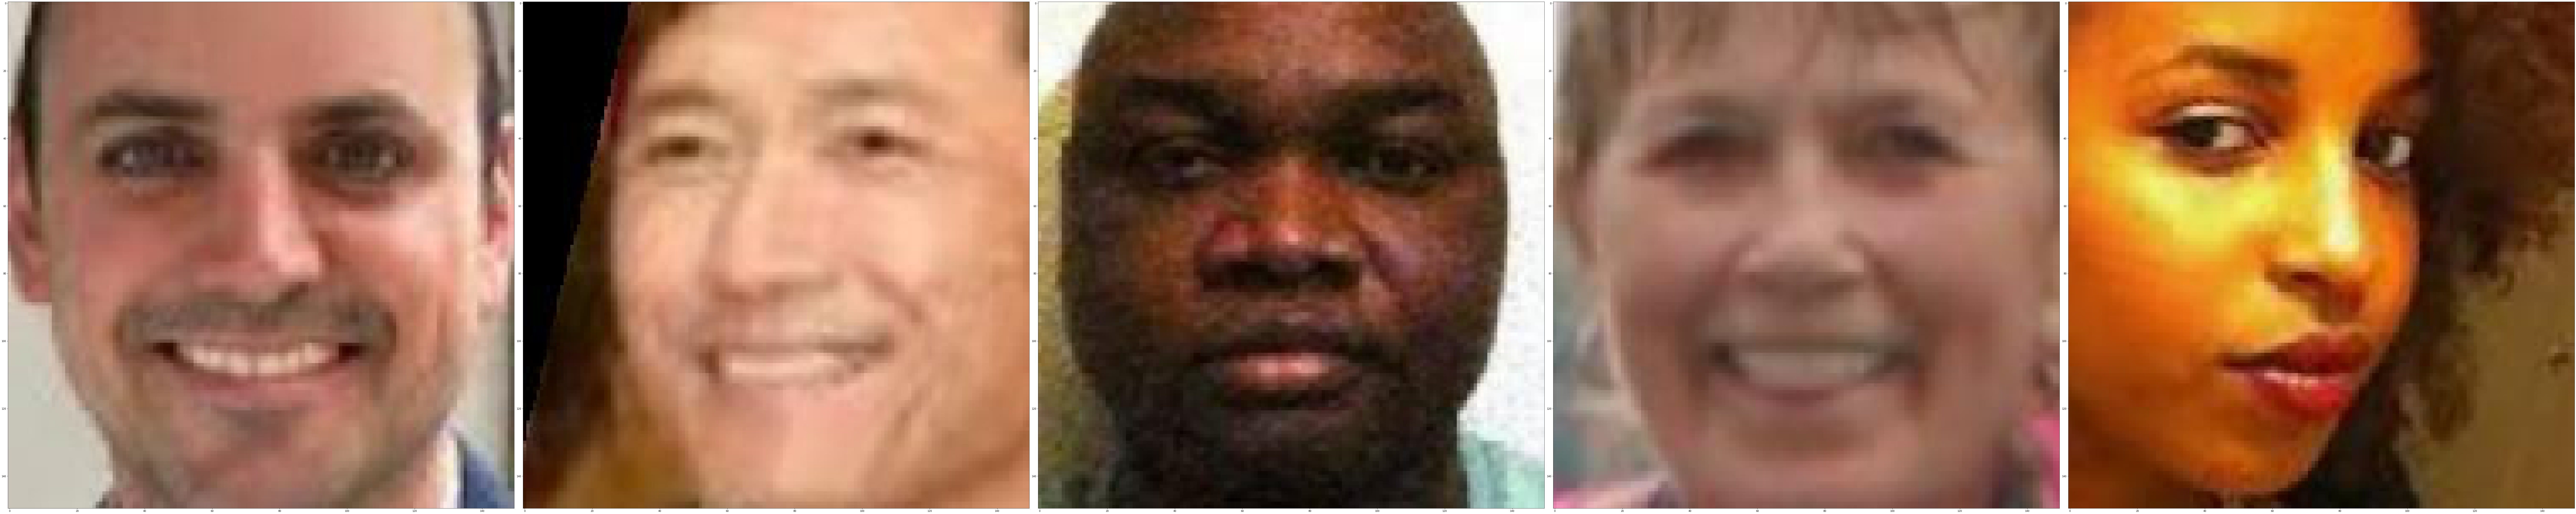

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3,))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']
             )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)
from keras.models import load_model
model.save('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/genero/my_model1.h5')

Epoch 1/15
180/180 [==============================] - 7687s 43s/step - loss: 0.4488 - accuracy: 0.7883 - val_loss: 0.3144 - val_accuracy: 0.8655
Epoch 2/15
180/180 [==============================] - 456s 3s/step - loss: 0.2762 - accuracy: 0.8820 - val_loss: 0.2814 - val_accuracy: 0.8802
Epoch 3/15
180/180 [==============================] - 452s 3s/step - loss: 0.2342 - accuracy: 0.9017 - val_loss: 0.2904 - val_accuracy: 0.8813
Epoch 4/15
180/180 [==============================] - 450s 3s/step - loss: 0.2048 - accuracy: 0.9157 - val_loss: 0.2735 - val_accuracy: 0.8835
Epoch 5/15
180/180 [==============================] - 457s 3s/step - loss: 0.1833 - accuracy: 0.9258 - val_loss: 0.2703 - val_accuracy: 0.8955
Epoch 6/15
180/180 [==============================] - 458s 3s/step - loss: 0.1605 - accuracy: 0.9355 - val_loss: 0.2988 - val_accuracy: 0.8893
Epoch 7/15
180/180 [==============================] - 452s 3s/step - loss: 0.1326 - accuracy: 0.9466 - val_loss: 0.2967 - val_accuracy: 0.89

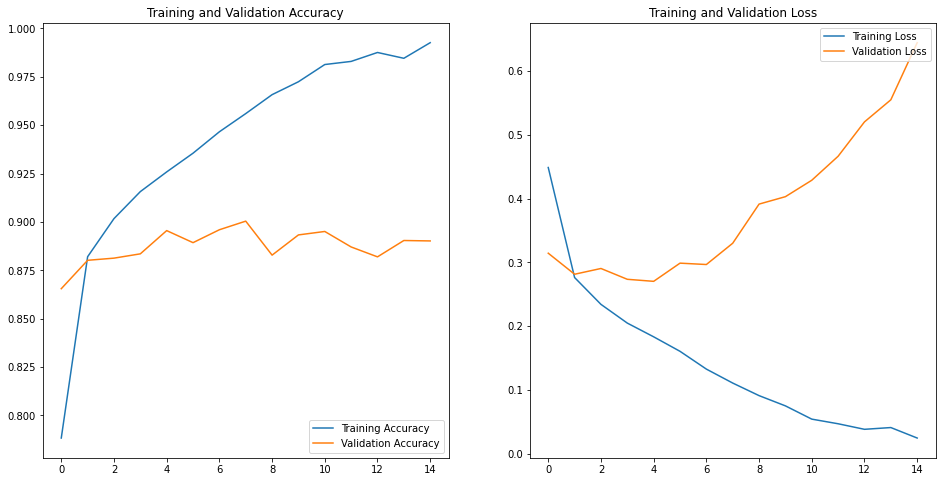

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Evaluacion del modelo
model.evaluate(val_data_gen,verbose=1)

45/45 [==============================] - 37s 820ms/step - loss: 0.6446 - accuracy: 0.8902


[0.6445798277854919, 0.8901734352111816]

[0]


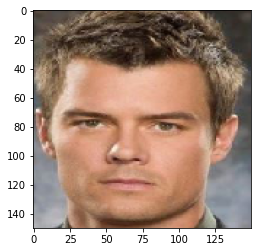

Hombre


In [ ]:
# predicting images
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img = image.load_img('/content/drive/My Drive/Diplomado DeepLearning/proyect/Captura.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes[0])
plt.imshow(img)
plt.show()

if classes[0]>0.5:
   print( "Mujer")
else:
   print("Hombre")

In [ ]:
# Clear resources
tf.keras.backend.clear_session()
epochs = 15

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True, 
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=train_dir, 
                                                shuffle=True, 
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                )

Found 17986 images belonging to 2 classes.


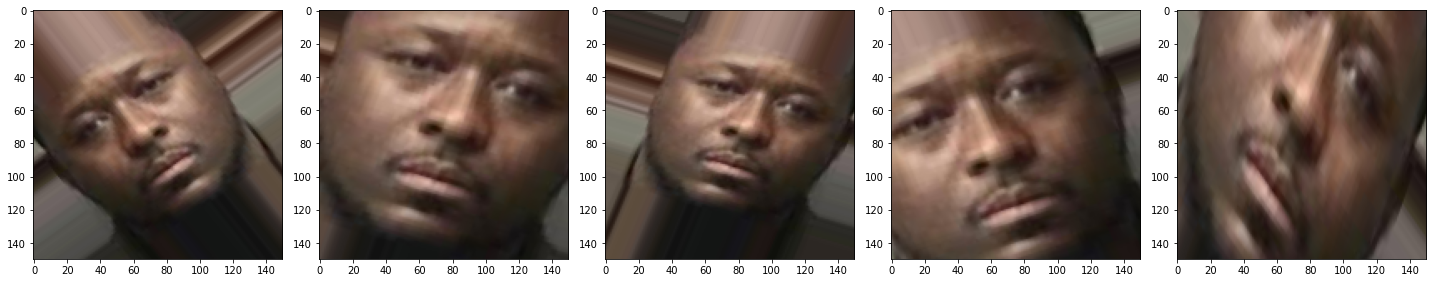

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, 
                                                 directory=validation_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 4498 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3,), kernel_regularizer=regularizers.l2(0.001))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)
from keras.models import load_model
model.save('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/genero/my_model2.h5')

Epoch 1/15
180/180 [==============================] - 551s 3s/step - loss: 0.8455 - accuracy: 0.6263 - val_loss: 0.7028 - val_accuracy: 0.6888
Epoch 2/15
180/180 [==============================] - 547s 3s/step - loss: 0.6939 - accuracy: 0.6664 - val_loss: 0.6587 - val_accuracy: 0.7270
Epoch 3/15
180/180 [==============================] - 554s 3s/step - loss: 0.6543 - accuracy: 0.6825 - val_loss: 0.6041 - val_accuracy: 0.7572
Epoch 4/15
180/180 [==============================] - 552s 3s/step - loss: 0.6391 - accuracy: 0.6906 - val_loss: 0.6006 - val_accuracy: 0.7581
Epoch 5/15
180/180 [==============================] - 548s 3s/step - loss: 0.6361 - accuracy: 0.6899 - val_loss: 0.5775 - val_accuracy: 0.7526
Epoch 6/15
180/180 [==============================] - 549s 3s/step - loss: 0.6258 - accuracy: 0.6932 - val_loss: 0.5931 - val_accuracy: 0.7303
Epoch 7/15
180/180 [==============================] - 546s 3s/step - loss: 0.6188 - accuracy: 0.7024 - val_loss: 0.5695 - val_accuracy: 0.7626

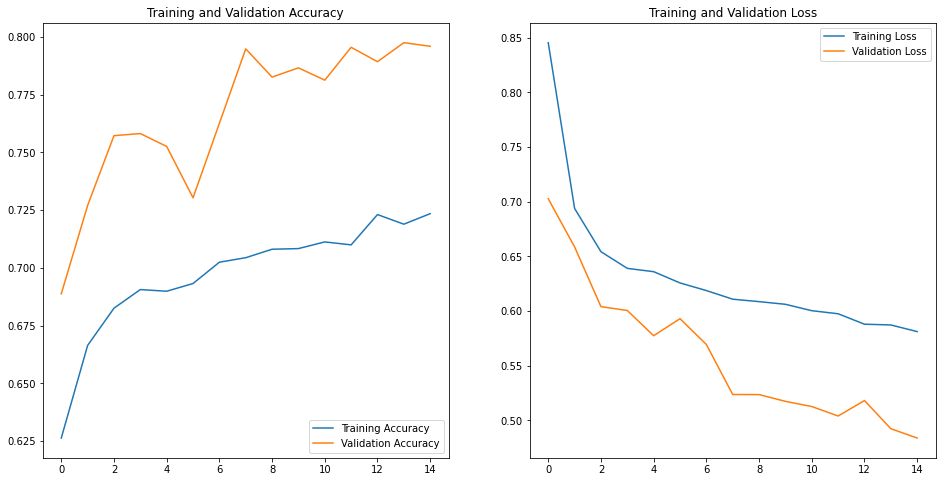

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
#Con esto se carga el modelo guardado
from keras.models import load_model
model = load_model('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/genero/my_model2.h5')

In [ ]:
#Evaluacion del modelo
model.evaluate(val_data_gen,verbose=1)

45/45 [==============================] - 37s 823ms/step - loss: 0.4839 - accuracy: 0.7959


[0.48390993475914, 0.7959092855453491]

[1]


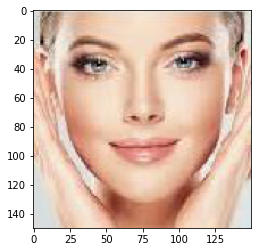

Mujer


In [17]:
# predicting images
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img = image.load_img('/content/drive/My Drive/Diplomado DeepLearning/proyect/Captura.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes[0])
plt.imshow(img)
plt.show()

if classes[0]>0:
   print( "Mujer")
else:
   print("Hombre")